# Trabalho em grupo - Ana Luisa, Ananda e Luis

## - HIPOTESE: Como a economia afeta o setor publico e privado de maneiras diferentes

## - Dataset: [BRICS - World Bank Indicator](https://www.kaggle.com/arslanali4343/real-estate-dataset)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1) Importando os datasets e abrindo para ver o conteúdo:

In [2]:
df_economy = pd.read_csv('data/BRICS Development Indicators/Economy_Data.csv', sep= ';')
df_private_sector = pd.read_csv('data/BRICS Development Indicators/PrivateSector_Data.csv', sep=';')
df_public_sector = pd.read_csv('data/BRICS Development Indicators/PublicSector_Indicators.csv', sep=';')

---

## 2) Criando DataFrames

Criação de um 'dataframe' onde cada valor de 'SeriesName' se torne uma coluna.  
Vamos tomar a média por ano para cada 'feature'.

### a) Economia

In [3]:
df_economy['Year'] = df_economy['Year'].astype('int64')

In [4]:
def SeriesName_DF(dataframe):
    df_mult = dataframe[["SeriesName", "Year", "Value"]].groupby(["Year", "SeriesName"]).mean()
    SeriesName_list = df_mult.index.get_level_values(1).unique().to_list()
    
    df_seriesname = pd.DataFrame()
    sn_column_list = []
    
    for seriesname in SeriesName_list:
        sn_column = df_mult[df_mult.index.get_level_values(1)==seriesname].droplevel(1).rename(columns={"Value" : seriesname})
        sn_column_list.append(sn_column)
    df_seriesname = pd.concat(sn_column_list, axis=1)
    
    targets = dataframe[["SeriesName", "Year", "Value"]].groupby(["Year"]).mean()
    
    return pd.concat([df_seriesname, targets], axis=1)

In [5]:
df_economy_SN = SeriesName_DF(df_economy)
df_economy_SN.head()

,Adjusted net national income (annual % growth),Adjusted net national income (constant 2010 US$),Adjusted net national income (current US$),Adjusted net national income per capita (annual % growth),Adjusted net national income per capita (constant 2010 US$),Adjusted net national income per capita (current US$),"Adjusted net savings, excluding particulate emission damage (% of GNI)","Adjusted net savings, excluding particulate emission damage (current US$)","Adjusted net savings, including particulate emission damage (% of GNI)","Adjusted net savings, including particulate emission damage (current US$)",...,Total reserves in months of imports,Total reserves minus gold (current US$),Trade (% of GDP),Trade in services (% of GDP),"Transport services (% of service exports, BoP)","Transport services (% of service imports, BoP)","Travel services (% of service exports, BoP)","Travel services (% of service imports, BoP)","Use of IMF credit (DOD, current US$)",Value
Year,,,,,,,,,,,,,,,,,,,,,
1970,NaN,2.917154e+11,6.029434e+10,NaN,2232.655378,202.095920,NaN,NaN,NaN,NaN,...,2.358050,7.501700e+08,18.231993,7.631499,20.000000,44.349315,56.428571,23.287671,0.000000e+00,1.753322e+11
1971,6.471394,2.413961e+11,5.380672e+10,3.983653,2972.407176,356.494462,15.470408,3.044258e+09,NaN,NaN,...,1.551095,9.681897e+08,18.442241,8.119831,20.673610,44.103132,59.044769,23.600494,0.000000e+00,1.781317e+11
1972,6.011575,2.616514e+11,6.012322e+10,3.431272,3137.592240,381.391654,16.193499,3.344763e+09,NaN,NaN,...,3.764724,1.885998e+09,19.099327,7.718721,22.397982,38.798445,56.474733,26.340076,0.000000e+00,1.793717e+11
1973,10.101633,2.888742e+11,7.523094e+10,7.421891,3448.301025,498.975816,21.277543,6.036556e+09,NaN,NaN,...,3.962601,2.552525e+09,20.357388,7.397890,24.484802,41.193563,57.884607,24.295091,2.493227e+07,1.901448e+11
1974,2.146270,2.974932e+11,8.604191e+10,-0.324611,3532.170799,606.901334,22.685263,8.066478e+09,NaN,NaN,...,3.864540,2.206845e+09,24.488069,7.469152,24.594337,47.875564,59.201869,25.252027,2.028382e+08,1.938223e+11


### b) Setor privado

In [6]:
df_private_sector['Year'] = df_private_sector['Year'].astype('int64')

In [7]:
df_private_SN = SeriesName_DF(df_private_sector)
df_private_SN.head()

,Agricultural raw materials exports (% of merchandise exports),Agricultural raw materials imports (% of merchandise imports),Average number of visits or required meetings with tax officials (for affected firms),Average time to clear exports through customs (days),"Binding coverage, all products (%)","Binding coverage, manufactured products (%)","Binding coverage, primary products (%)","Bound rate, simple mean, all products (%)","Bound rate, simple mean, manufactured products (%)","Bound rate, simple mean, primary products (%)",...,Time to obtain an electrical connection (days),Time to prepare and pay taxes (hours),Time to resolve insolvency (years),Total tax and contribution rate (% of profit),Transport services (% of commercial service exports),Transport services (% of commercial service imports),Travel services (% of commercial service exports),Travel services (% of commercial service imports),Value lost due to electrical outages (% of sales for affected firms),Value
Year,,,,,,,,,,,,,,,,,,,,,
1970,8.725796,5.529160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,20.487805,45.279720,57.804878,23.776224,NaN,3.456341e+08
1971,7.953770,5.401722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,21.007996,44.965126,59.999790,24.061765,NaN,3.851163e+08
1972,7.574604,5.318545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,22.635121,39.710759,57.072661,26.959441,NaN,4.602504e+08
1973,6.800030,3.482063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,24.701632,42.182462,58.397215,24.878323,NaN,6.650080e+08
1974,6.642671,2.772902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,24.769729,48.590172,59.624060,25.628948,NaN,9.227325e+08


### C) Setor público

In [8]:
df_public_sector['Year'] = df_public_sector['Year'].astype('int64')

In [9]:
df_public_SN = SeriesName_DF(df_public_sector)
df_public_SN.head()

,Adequacy of social insurance programs (% of total welfare of beneficiary households),Adequacy of social protection and labor programs (% of total welfare of beneficiary households),Adequacy of social safety net programs (% of total welfare of beneficiary households),Adequacy of unemployment benefits and ALMP (% of total welfare of beneficiary households),"Air transport, freight (million ton-km)","Air transport, passengers carried","Air transport, registered carrier departures worldwide","Annualized average growth rate in per capita real survey mean consumption or income, bottom 40% of population (%)","Annualized average growth rate in per capita real survey mean consumption or income, total population (%)",Armed forces personnel (% of total labor force),...,"Unemployment, youth male (% of male labor force ages 15-24) (national estimate)","Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth total (% of total labor force ages 15-24) (national estimate)","Vulnerable employment, female (% of female employment) (modeled ILO estimate)","Vulnerable employment, male (% of male employment) (modeled ILO estimate)","Vulnerable employment, total (% of total employment) (modeled ILO estimate)","Wage and salaried workers, female (% of female employment) (modeled ILO estimate)","Wage and salaried workers, male (% of male employment) (modeled ILO estimate)","Wage and salaried workers, total (% of total employment) (modeled ILO estimate)",Value
Year,,,,,,,,,,,,,,,,,,,,,
1970,NaN,NaN,NaN,NaN,105.733336,2.510133e+06,91666.666667,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.144226e+08
1971,NaN,NaN,NaN,NaN,117.500000,2.708167e+06,86666.666667,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.331153e+08
1972,NaN,NaN,NaN,NaN,153.733337,3.275100e+06,100300.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.603605e+08
1973,NaN,NaN,NaN,NaN,201.966670,3.849267e+06,105100.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.083082e+08
1974,NaN,NaN,NaN,NaN,181.150002,3.341600e+06,87675.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.148702e+09


---

## 3) Seleção de Características

In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [11]:
from sklearn.model_selection import train_test_split

### a) Economia

#### Eliminando todos os NaN

In [12]:
df_economy_SN.isna().sum().sort_values(ascending=False)

Net ODA provided, total (constant 2015 US$)                    50
Data from database: World Development Indicators               50
Net official flows from UN agencies, UNECE (current US$)       50
Net official flows from UN agencies, UNEP (current US$)        50
Net official flows from UN agencies, UNPBF (current US$)       50
                                                               ..
Gross fixed capital formation, private sector (current LCU)     0
Gross fixed capital formation, private sector (% of GDP)        0
Gross fixed capital formation (current US$)                     0
Gross fixed capital formation (current LCU)                     0
Value                                                           0
Length: 348, dtype: int64

In [13]:
df_economy_SN.dropna(axis=1, inplace=True)

#### Seleção das características mais úteis

Aplicaremos o método apresentado no do Amr, *Hands-On Machine Learning with scikit-learn and Scientific Python Toolkits*.

In [14]:
df_train, df_test = train_test_split(df_economy_SN, test_size=0.3)

In [15]:
X_train = df_train.drop('Value', axis=1)
X_test = df_train.drop('Value', axis=1)

In [16]:
y_train = df_train['Value']
y_train = df_train['Value']

#### VarianceThreshold

In [17]:
from sklearn.feature_selection import VarianceThreshold

In [18]:
vt = VarianceThreshold(threshold=0)

In [19]:
vt.fit(X_train)

VarianceThreshold(threshold=0)

In [20]:
X_train = X_train.iloc[:, vt.get_support()]
X_test = X_test.iloc[:, vt.get_support()]

In [21]:
pd.DataFrame(
    {
        'Feature': X_train.columns.tolist(),
        'Variance': vt.variances_
    }
).sort_values('Variance', ascending=True)

,Feature,Variance
170,"Personal remittances, received (% of GDP)",8.033632e-02
176,Public and publicly guaranteed debt service (%...,2.091875e-01
46,"Foreign direct investment, net outflows (% of ...",2.941864e-01
44,"Foreign direct investment, net inflows (% of GDP)",9.405303e-01
193,Total debt service (% of GNI),1.047020e+00
...,...,...
49,GDP (constant LCU),6.310737e+13
107,Gross value added at basic prices (GVA) (curre...,7.340551e+13
98,Gross national expenditure (current LCU),8.021185e+13
60,GNI (current LCU),8.360877e+13


#### Filtros

Aplicaremos os métodos **ANOVA (F-values)** e **mutual information**

In [22]:
from sklearn.feature_selection import f_regression

In [23]:
f, p = f_regression(X_train, y_train)

In [24]:
from sklearn.feature_selection import mutual_info_regression

In [25]:
mi = mutual_info_regression(X_train, y_train)

In [26]:
pd.DataFrame(
    {
        'Feature': X_train.columns.tolist(),
        'F': f,
        'MI': mi,
        'Variance': vt.variances_
    }
).sort_values('F', ascending=False).style.bar(subset=['F', 'MI', 'Variance'], color='grey')

,Feature,F,MI,Variance
112,Households and NPISHs Final consumption expenditure (current LCU),1488.376610,1.591297,46353435928839.843750
41,Final consumption expenditure (current LCU),1451.328737,1.596892,58003219163566.914062
60,GNI (current LCU),1445.192686,1.619908,83608773491209.437500
50,GDP (current LCU),1432.573803,1.617310,84856922309015.640625
190,Taxes less subsidies on products (current LCU),1424.881351,1.600910,7961909424360.722656
4,"Agriculture, forestry, and fishing, value added (current LCU)",1411.268546,1.557484,8687006749514.589844
132,"Industry (including construction), value added (current LCU)",1407.624122,1.652973,25411166087124.667969
107,Gross value added at basic prices (GVA) (current LCU),1363.810422,1.616902,73405514874245.687500
140,"Manufacturing, value added (current LCU)",1287.231871,1.595285,14087083767645.390625
186,"Services, value added (current LCU)",1221.873544,1.534755,44382859805835.523438


### b) Setor privado

Eliminando todos os NaN

In [27]:
df_private_SN.isna().sum().sort_values(ascending=False)

Data from database: World Development Indicators                       50
Last Updated: 10/15/2020                                               50
Investment in ICT with private participation (current US$)             49
Ease of doing business index (1=most business-friendly regulations)    49
Firms that spend on R&D (% of firms)                                   47
                                                                       ..
Merchandise exports (current US$)                                       0
Agricultural raw materials imports (% of merchandise imports)           0
Merchandise imports (current US$)                                       0
Merchandise trade (% of GDP)                                            0
Value                                                                   0
Length: 171, dtype: int64

In [28]:
df_private_SN.dropna(axis=1, inplace=True)

#### Seleção das características mais úteis

In [29]:
df_train, df_test = train_test_split(df_private_SN, test_size=0.3)

In [30]:
X_train = df_train.drop('Value', axis=1)
X_test = df_train.drop('Value', axis=1)

In [31]:
y_train = df_train['Value']
y_train = df_train['Value']

#### VarianceThreshold

In [32]:
vt = VarianceThreshold(threshold=0)

In [33]:
vt.fit(X_train)

VarianceThreshold(threshold=0)

In [34]:
X_train = X_train.iloc[:, vt.get_support()]
X_test = X_test.iloc[:, vt.get_support()]

In [35]:
pd.DataFrame(
    {
        'Feature': X_train.columns.tolist(),
        'Variance': vt.variances_
    }
).sort_values('Variance', ascending=True)

,Feature,Variance
18,Ores and metals imports (% of merchandise impo...,9.635796e-01
1,Agricultural raw materials imports (% of merch...,1.527780e+00
0,Agricultural raw materials exports (% of merch...,3.370494e+00
11,Insurance and financial services (% of commerc...,4.210460e+00
10,Insurance and financial services (% of commerc...,4.478157e+00
17,Ores and metals exports (% of merchandise expo...,4.581306e+00
7,Food imports (% of merchandise imports),6.034052e+00
19,Transport services (% of commercial service ex...,1.987647e+01
9,Fuel imports (% of merchandise imports),2.113892e+01
8,Fuel exports (% of merchandise exports),2.170936e+01


#### Filtros

Aplicaremos os métodos **ANOVA (F-values)** e **mutual information**

In [36]:
f, p = f_regression(X_train, y_train)

In [37]:
mi = mutual_info_regression(X_train, y_train)

In [38]:
pd.DataFrame(
    {
        'Feature': X_train.columns.tolist(),
        'F': f,
        'MI': mi,
        'Variance': vt.variances_
    }
).sort_values('MI', ascending=False).style.bar(subset=['F', 'MI', 'Variance'], color='grey')

,Feature,F,MI,Variance
15,Merchandise imports (current US$),2178.889500,1.923584,623934650000.000000
14,Merchandise exports (current US$),1296.748954,1.817802,674171200000.000000
3,Commercial service imports (current US$),233.384990,1.637042,149371082468.382904
2,Commercial service exports (current US$),719.089176,1.543598,99777990873.060410
16,Merchandise trade (% of GDP),70.908175,0.949792,30.275979
8,Fuel exports (% of merchandise exports),111.743675,0.942093,21.709362
0,Agricultural raw materials exports (% of merchandise exports),21.118979,0.888104,3.370494
12,Manufactures exports (% of merchandise exports),2.733944,0.838433,35.080018
20,Transport services (% of commercial service imports),77.359351,0.748736,35.453272
4,"Computer, communications and other services (% of commercial service exports)",74.839096,0.736221,45.126657


### c) Seto público

Eliminando todos os NaN

In [39]:
df_public_SN.isna().sum().sort_values(ascending=False)

Multidimensional poverty intensity (average share of deprivations experienced by the poor)    50
Presence of peace keepers (number of troops, police, and military observers in mandate)       50
Multidimensional poverty headcount ratio (% of total population)                              50
Multidimensional poverty headcount ratio, children (% of population ages 0-17)                50
Multidimensional poverty headcount ratio, female (% of female population)                     50
                                                                                              ..
Arms imports (SIPRI trend indicator values)                                                    0
Military expenditure (% of GDP)                                                                0
Military expenditure (current LCU)                                                             0
Refugee population by country or territory of asylum                                           0
Value                         

In [40]:
df_public_SN.dropna(axis=1, inplace=True)

#### Seleção das características mais úteis

In [41]:
df_train, df_test = train_test_split(df_public_SN, test_size=0.3)

In [42]:
X_train = df_train.drop('Value', axis=1)
X_test = df_train.drop('Value', axis=1)

In [43]:
y_train = df_train['Value']
y_train = df_train['Value']

#### VarianceThreshold

In [44]:
vt = VarianceThreshold(threshold=0)

In [45]:
vt.fit(X_train)

VarianceThreshold(threshold=0)

In [46]:
X_train = X_train.iloc[:, vt.get_support()]
X_test = X_test.iloc[:, vt.get_support()]

In [47]:
pd.DataFrame(
    {
        'Feature': X_train.columns.tolist(),
        'Variance': vt.variances_
    }
).sort_values('Variance', ascending=True)

,Feature,Variance
2,Military expenditure (% of GDP),1.623779e-01
6,Refugee population by country or territory of ...,7.236620e+04
5,Refugee population by country or territory of ...,1.716060e+05
1,Arms imports (SIPRI trend indicator values),1.473250e+09
0,Arms exports (SIPRI trend indicator values),1.900550e+09
4,Military expenditure (current USD),8.445174e+10
3,Military expenditure (current LCU),2.230567e+12


#### Filtros

Aplicaremos os métodos **ANOVA (F-values)** e **mutual information**

In [48]:
f, p = f_regression(X_train, y_train)

In [49]:
mi = mutual_info_regression(X_train, y_train)

In [50]:
pd.DataFrame(
    {
        'Feature': X_train.columns.tolist(),
        'F': f,
        'MI': mi,
        'Variance': vt.variances_
    }
).sort_values('F', ascending=False).style.bar(subset=['F', 'MI', 'Variance'], color='grey')

,Feature,F,MI,Variance
4,Military expenditure (current USD),94.318065,1.689429,84451741328.208511
3,Military expenditure (current LCU),59.371703,1.642163,2230567392226.814453
0,Arms exports (SIPRI trend indicator values),57.739900,0.488580,1900550000.000000
2,Military expenditure (% of GDP),24.626526,0.450289,0.162378
6,Refugee population by country or territory of origin,23.420907,0.778461,72366.200000
1,Arms imports (SIPRI trend indicator values),5.554676,0.196056,1473250000.000000
5,Refugee population by country or territory of asylum,3.203174,0.597186,171606.000000


---

## 4) Comparando a economia com os setores público e privado

### Seleção de características

#### Criando o DataFrame

In [51]:
df = pd.DataFrame()

In [52]:
df = pd.concat([df_private_SN.drop('Value', axis=1), df_public_SN.drop('Value', axis=1)], axis=1)

In [53]:
df['Target'] = df_economy_SN['Value']

In [54]:
df

,Agricultural raw materials exports (% of merchandise exports),Agricultural raw materials imports (% of merchandise imports),Commercial service exports (current US$),Commercial service imports (current US$),"Computer, communications and other services (% of commercial service exports)","Computer, communications and other services (% of commercial service imports)",Food exports (% of merchandise exports),Food imports (% of merchandise imports),Fuel exports (% of merchandise exports),Fuel imports (% of merchandise imports),...,Travel services (% of commercial service exports),Travel services (% of commercial service imports),Arms exports (SIPRI trend indicator values),Arms imports (SIPRI trend indicator values),Military expenditure (% of GDP),Military expenditure (current LCU),Military expenditure (current USD),Refugee population by country or territory of asylum,Refugee population by country or territory of origin,Target
Year,,,,,,,,,,,,,,,,,,,,,
1970,8.725796,5.529160,5.739998e+08,8.007997e+08,10.243902,19.930070,46.462733,15.918533,0.707865,10.034272,...,57.804878,23.776224,4.480000e+08,3.917500e+08,2.802073,4.681917e+09,1.092367e+09,48250.000000,22210.00,1.753322e+11
1971,7.953770,5.401722,6.919978e+08,9.297000e+08,8.686856,19.993596,45.172920,11.740365,0.681702,12.172709,...,59.999790,24.061765,3.260000e+08,5.797500e+08,2.909898,5.747917e+09,1.272065e+09,47090.000000,18252.50,1.781317e+11
1972,7.574604,5.318545,7.359348e+08,8.840076e+08,9.521088,22.001944,46.196656,8.621072,0.826469,12.701566,...,57.072661,26.959441,4.173333e+08,6.360000e+08,2.842143,6.447917e+09,1.395044e+09,47340.000000,19485.00,1.793717e+11
1973,6.800030,3.482063,9.828673e+08,1.148129e+09,7.787410,21.179422,47.540027,15.494862,1.342191,14.472803,...,58.397215,24.878323,2.320000e+08,5.612500e+08,2.653402,6.703083e+09,1.598506e+09,47020.000000,525.00,1.901448e+11
1974,6.642671,2.772902,1.240250e+09,1.478068e+09,7.184626,14.942477,39.233744,10.890510,0.992745,17.354967,...,59.624060,25.628948,1.422500e+08,4.330000e+08,2.743126,8.068833e+09,1.929283e+09,46950.000000,730.00,1.938223e+11
1975,4.856521,2.334360,1.059128e+09,1.735654e+09,24.534350,20.447333,40.165339,14.311127,1.490497,10.261333,...,31.950067,14.768351,1.940000e+08,4.667500e+08,3.127232,9.632417e+09,2.298823e+09,32000.000000,715.00,1.779141e+11
1976,4.805551,2.748771,1.066633e+09,1.691285e+09,25.175414,23.804479,38.107840,13.394641,1.923457,19.233457,...,31.457678,14.681408,2.353333e+08,7.320000e+08,3.402876,1.032742e+10,2.516221e+09,30000.000000,1120.00,1.848404e+11
1977,4.200755,4.711108,1.267920e+09,1.892886e+09,26.186913,28.853875,37.577782,9.844379,2.327169,20.013019,...,35.067243,12.754707,1.230000e+08,8.802500e+08,3.371278,1.072933e+10,2.683488e+09,36000.000000,1222.50,1.973782e+11
1978,4.146530,3.436147,1.487664e+09,2.175430e+09,26.669255,30.173017,32.549235,9.570547,2.296968,19.811969,...,35.822828,12.337603,2.743333e+08,6.420000e+08,3.096067,1.145717e+10,2.911477e+09,35000.000000,1945.00,2.106994e+11


#### Particionando o DataFrame

In [92]:
df_train, df_test = train_test_split(df, test_size=0.3)

In [93]:
X_train = df_train.drop('Target', axis=1)
X_test = df_test.drop('Target', axis=1)

In [94]:
y_train = df_train['Target']
y_test = df_test['Target']

#### VarianceThreshold

In [58]:
vt = VarianceThreshold(threshold=0)

In [59]:
vt.fit(X_train)

VarianceThreshold(threshold=0)

In [60]:
X_train = X_train.iloc[:, vt.get_support()]
X_test = X_test.iloc[:, vt.get_support()]

In [61]:
pd.DataFrame(
    {
        'Feature': X_train.columns.tolist(),
        'Variance': vt.variances_
    }
).sort_values('Variance', ascending=True)

,Feature,Variance
25,Military expenditure (% of GDP),1.734554e-01
18,Ores and metals imports (% of merchandise impo...,9.935670e-01
1,Agricultural raw materials imports (% of merch...,1.602445e+00
0,Agricultural raw materials exports (% of merch...,3.117168e+00
11,Insurance and financial services (% of commerc...,3.620817e+00
10,Insurance and financial services (% of commerc...,4.138598e+00
17,Ores and metals exports (% of merchandise expo...,5.126880e+00
7,Food imports (% of merchandise imports),6.776920e+00
22,Travel services (% of commercial service imports),2.123680e+01
9,Fuel imports (% of merchandise imports),2.145379e+01


#### Filtros

Aplicaremos os métodos **ANOVA (F-values)** e **mutual information**

In [62]:
f, p = f_regression(X_train, y_train)

In [63]:
mi = mutual_info_regression(X_train, y_train)

In [66]:
pd.DataFrame(
    {
        'Feature': X_train.columns.tolist(),
        'F': f,
        'MI': mi,
        'Variance': vt.variances_
    }
).sort_values('MI', ascending=False).reset_index().style.bar(subset=['F', 'MI', 'Variance'], color='grey')

,index,Feature,F,MI,Variance
0,26,Military expenditure (current LCU),975.723008,1.642260,2036838859719.062744
1,2,Commercial service exports (current US$),1012.598818,1.548719,109425441998.220123
2,14,Merchandise exports (current US$),691.844238,1.546821,715120200000.000000
3,27,Military expenditure (current USD),1592.073972,1.531216,81504571522.632095
4,3,Commercial service imports (current US$),1270.446392,1.469944,163752457384.853668
5,15,Merchandise imports (current US$),553.448930,1.468693,637547050000.000000
6,12,Manufactures exports (% of merchandise exports),3.618255,0.927571,35.245219
7,8,Fuel exports (% of merchandise exports),60.529422,0.844261,22.210719
8,0,Agricultural raw materials exports (% of merchandise exports),17.654204,0.809762,3.117168
9,28,Refugee population by country or territory of asylum,6.406868,0.789371,153978.000000


### Regressão sem regularização

In [155]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [109]:
# from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt

#### Procura de melhor k-vizinhos

In [140]:
rmse_val = [] #to store rmse values for different k
rmse_val_dis = [] #to store rmse values for different k
K_list = []

for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors=K, weights='uniform')
    model_dis = neighbors.KNeighborsRegressor(n_neighbors=K, weights='distance')

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values

    model_dis.fit(X_train, y_train)  #fit the model
    pred_dis=model_dis.predict(X_test) #make prediction on test set
    error_dis = sqrt(mean_squared_error(y_test,pred_dis)) #calculate rmse
    rmse_val_dis.append(error_dis) #store rmse values
   
    K_list.append(K) #store K values

In [142]:
df_k_test = pd.DataFrame({'K': K_list, 'uniform': rmse_val, 'distance': rmse_val_dis})
df_k_test

,K,uniform,distance
0,1,1.862721e+11,1.862721e+11
1,2,1.810357e+11,1.421863e+11
2,3,2.352704e+11,1.823756e+11
3,4,1.943099e+11,1.590024e+11
4,5,1.889702e+11,1.463173e+11
5,6,2.209544e+11,1.412163e+11
6,7,2.846054e+11,1.481150e+11
7,8,3.422065e+11,1.557571e+11
8,9,4.107439e+11,1.724347e+11
9,10,4.680242e+11,1.866659e+11


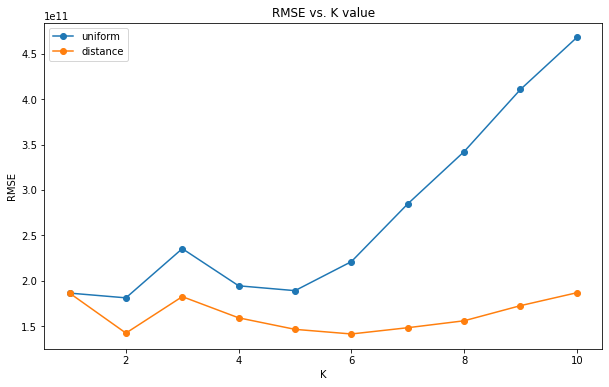

In [153]:
plt.figure(figsize=(10,6))
plt.plot(df_k_test['K'], df_k_test['uniform'], marker='o', label='uniform')
plt.plot(df_k_test['K'], df_k_test['distance'], marker='o', label='distance')

plt.title('RMSE vs. K value')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.legend()

plt.show()

#### Treinando os modelos

In [156]:
linear = LinearRegression().fit(X_train, y_train)

neigh = KNeighborsRegressor(n_neighbors=2, weights='distance').fit(X_train, y_train)

tree = DecisionTreeRegressor().fit(X_train, y_train)

#### Testando os modelos

In [159]:
y_l = linear.predict(X_test)
y_l_train = linear.predict(X_train)

y_n = neigh.predict(X_test)
y_n_train = neigh.predict(X_train)

y_t = tree.predict(X_test)
y_t_train = tree.predict(X_train)

##### Indicadores

In [158]:
from sklearn.metrics import mean_squared_error, r2_score

In [161]:
r2_l_test = r2_score(y_test, y_l)
r2_l_train = r2_score(y_train, y_l_train)

r2_n_test = r2_score(y_test, y_n)
r2_n_train = r2_score(y_train, y_n_train)

r2_t_test = r2_score(y_test, y_t)
r2_t_train = r2_score(y_train, y_t_train)

In [165]:
print('Regressão Linear:')
print(f"Scores R^2 Treino: {str(r2_l_train)}")
print(f"Scores R^2 Teste:{str(r2_l_test)}")
print(f"MSE: {mean_squared_error(y_test, y_l)}")
print('################')
print('Regressão KNN:')
print(f"Scores R^2 Treino: {str(r2_n_train)}")
print(f"Scores R^2 Teste:{str(r2_n_test)}")
print(f"MSE: {mean_squared_error(y_test, y_n)}")
print('################')
print('Árvore de regressão:')
print(f"Scores R^2 Treino: {str(r2_t_train)}")
print(f"Scores R^2 Teste:{str(r2_t_test)}")
print(f"MSE: {mean_squared_error(y_test, y_t)}")

Regressão Linear:
Scores R^2 Treino: 0.9982320019564024
Scores R^2 Teste:0.9006684196307104
MSE: 2.3219228404261198e+23
################
Regressão KNN:
Scores R^2 Treino: 1.0
Scores R^2 Teste:0.9913512134684765
MSE: 2.0216949045666135e+22
################
Árvore de regressão:
Scores R^2 Treino: 1.0
Scores R^2 Teste:0.47984556781945853
MSE: 1.2158856751687023e+24


### Regularização L2 - Ridge

In [167]:
from sklearn.linear_model import Ridge

In [166]:
alphas = 10**np.linspace(-2,3,100)

In [168]:
MSEs  = []
coefs = []

for a in alphas:
    ridge = Ridge(alpha=a, normalize=True)
    ridge.fit(X_train, y_train) 
    MSEs.append(mean_squared_error(y_test,ridge.predict(X_test)))
    coefs.append(ridge.coef_.ravel().tolist())

In [171]:
coefs = np.array(coefs)
coefs.shape

(100, 30)

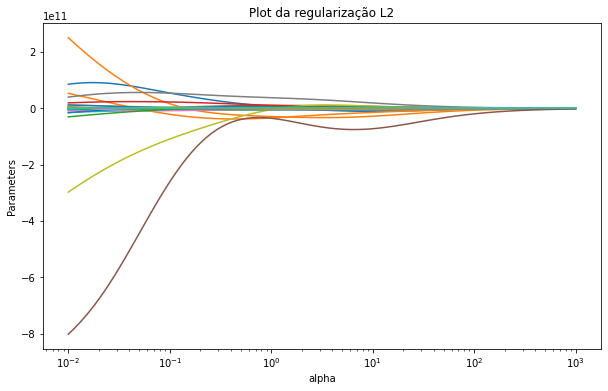

In [176]:
plt.figure(figsize=(10,6))
plt.plot(alphas, coefs)
plt.xscale('log')

plt.title('Plot da regularização L2')
plt.xlabel('alpha')
plt.ylabel('Parameters')

plt.show()

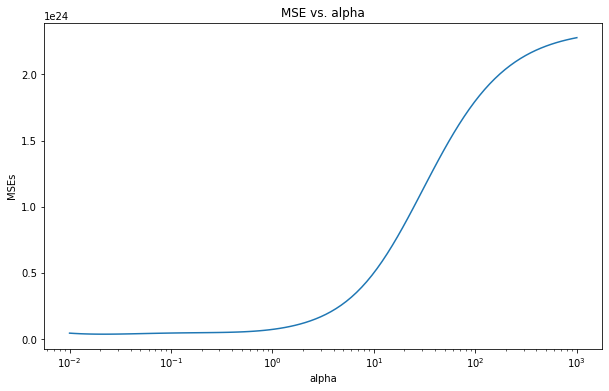

In [179]:
plt.figure(figsize=(10,6))
plt.plot(alphas, MSEs)

plt.title('MSE vs. alpha')
plt.xscale('log')
plt.ylabel('MSEs')
plt.xlabel('alpha')
plt.show()

#### RidgeCV

In [180]:
from sklearn.linear_model import RidgeCV

In [181]:
ridgecv = RidgeCV(alphas=alphas, normalize=True)

#ridgecv = RidgeCV(alphas = alphas, scoring = 'r2', normalize = True)
#ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
#ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_absolute_error', normalize = True)

ridgecv.fit(X_train, y_train)
print(ridgecv.alpha_)
print(ridgecv.coef_)
print(mean_squared_error(y_test, ridgecv.predict(X_test)))

0.08111308307896872
[ 6.04182969e+10  2.80670337e+10  6.01384556e+00  4.66422360e+00
 -4.59713176e+08  1.59724245e+09  2.87861123e+08 -6.50120673e+09
  4.59719133e+09 -7.45615572e+09  2.12895782e+08 -1.61895897e+10
 -5.01381124e+09  2.29819186e+10  5.50698693e-01  5.62701157e-01
 -8.47623736e+09  5.48479466e+10 -1.21665737e+11  2.91159247e+09
  1.90881208e+09 -5.75313499e+08 -5.57018549e+09 -1.79096460e+02
  3.06344434e+02 -3.13212811e+11  6.99106011e-01  9.33563539e+00
  2.47430762e+06 -4.12711898e+05]
4.554200637744799e+22
